<a href="https://colab.research.google.com/github/Akshayakrishna262/mlapplications/blob/main/Prediction_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
from google.colab import files
uploaded=files.upload()
file_name=list(uploaded.keys())[0]
df=pd.read_csv(file_name)

Saving Toyoto_Corrola.csv to Toyoto_Corrola.csv


In [ ]:
df.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [ ]:
df.dropna(inplace=True)

In [ ]:
features = ['Age_08_04', 'Doors', 'HP', 'Cylinders']

In [ ]:
X = df[features]
y = df['Price']

In [ ]:
print(df['Model'].unique()[:15])

['TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors'
 'ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors'
 'TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors'
 'ÊTOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors'
 'TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors'
 'ÊTOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors'
 'ÊTOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors'
 'TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors'
 'TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2/3-Doors'
 'TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors'
 'ÊTOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors'
 'ÊTOYOTA Corolla 1.6 VVTI Linea Terra Comfort 2/3-Doors'
 'TOYOTA Corolla 1.6 16v L.SOL 2/3-Doors'
 'TOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors'
 'ÊTOYOTA Corolla 1.6 16V VVT I 3DR TERRA 2/3-Doors']


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Model'] = LE.fit_transform(df['Model'])
df.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,257,13500,23,46986,90,3,4,5,1165
1,2,257,13750,23,72937,90,3,4,5,1165
2,3,365,13950,24,41711,90,3,4,5,1165
3,4,257,14950,26,48000,90,3,4,5,1165
4,5,256,13750,30,38500,90,3,4,5,1170


In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('Model ~ Price + Age_08_04 + KM + Doors + Cylinders + Gears + Weight', data=df).fit()

In [ ]:
model.params

,0
Intercept,-32.717743
Price,-0.003746
Age_08_04,-1.640542
KM,0.000369
Doors,-0.224347
Cylinders,-130.870973
Gears,-15.445533
Weight,0.810768


In [ ]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -6.799200
Price        -2.386094
Age_08_04    -6.612911
KM            4.605578
Doors        -0.091353
Cylinders    -6.799200
Gears        -1.291493
Weight       13.660336
dtype: float64 
 Intercept    1.541098e-11
Price        1.715795e-02
Age_08_04    5.309256e-11
KM           4.478947e-06
Doors        9.272253e-01
Cylinders    1.541098e-11
Gears        1.967416e-01
Weight       5.079673e-40
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.28230458705773165, 0.2792911703483869)

In [ ]:
ml_price=smf.ols('Model ~ Price',data=df).fit()
print(ml_price.tvalues,'\n',ml_price.pvalues)

Intercept     5.173805
Price        12.121866
dtype: float64 
 Intercept    2.618725e-07
Price        2.884397e-32
dtype: float64


In [ ]:
(ml_price.rsquared,ml_price.rsquared_adj)

(0.09294449501527913, 0.09231195979562457)

In [ ]:
ml_age=smf.ols('Model ~ Age_08_04',data=df).fit()
print(ml_age.tvalues,'\n',ml_age.pvalues)

Intercept    28.780142
Age_08_04   -12.923525
dtype: float64 
 Intercept    3.758166e-144
Age_08_04     3.203333e-36
dtype: float64


In [ ]:
(ml_age.rsquared,ml_age.rsquared_adj)

(0.10431959281151737, 0.10369499001710425)

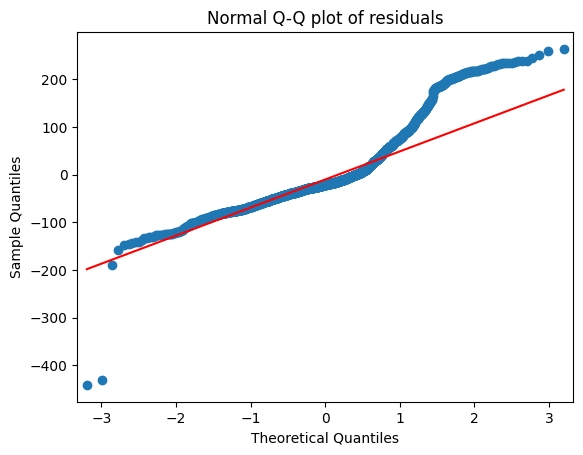

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
def get_standardized_values( vals ):
  return (vals - vals.mean())/vals.std()

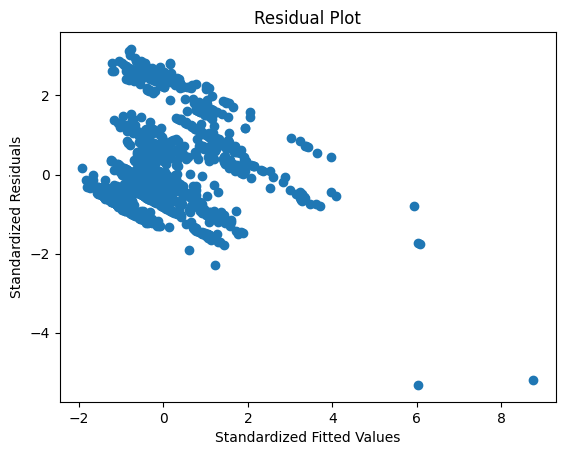

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()

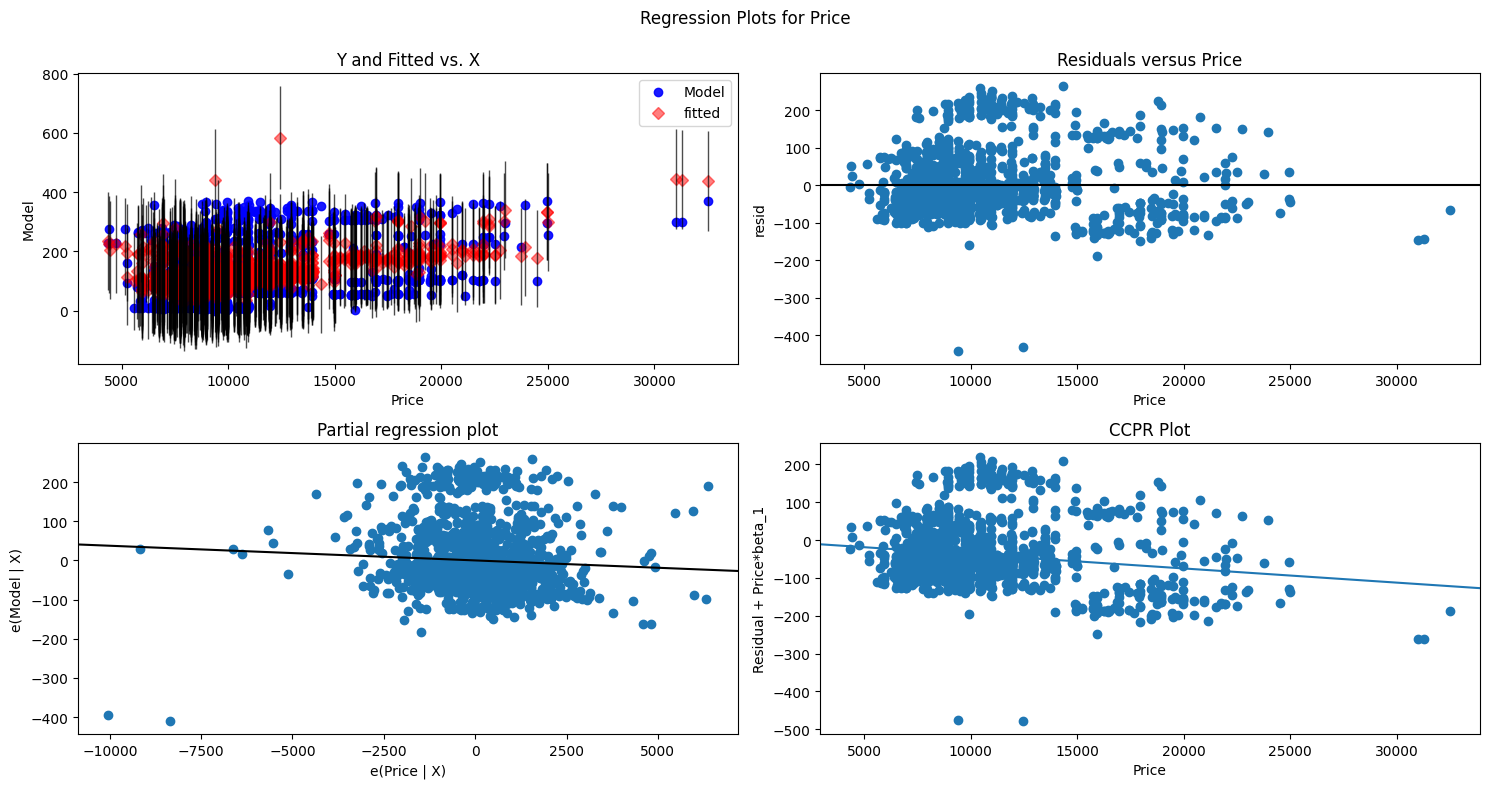

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Price", fig=fig)
plt.show()

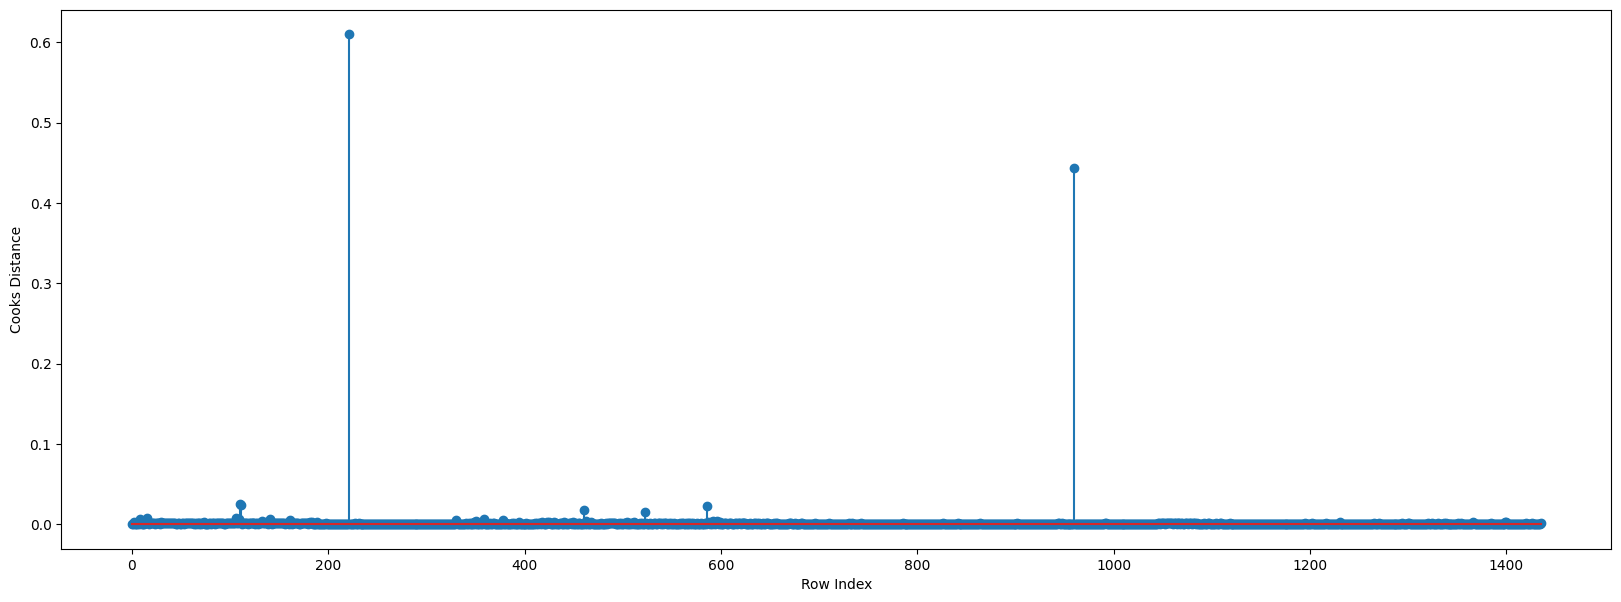

In [ ]:
fig=plt.subplots(figsize=(20,7))
influence = model.get_influence()
c = influence.cooks_distance[0]
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(c),np.max(c))

(221, 0.6104069806532418)

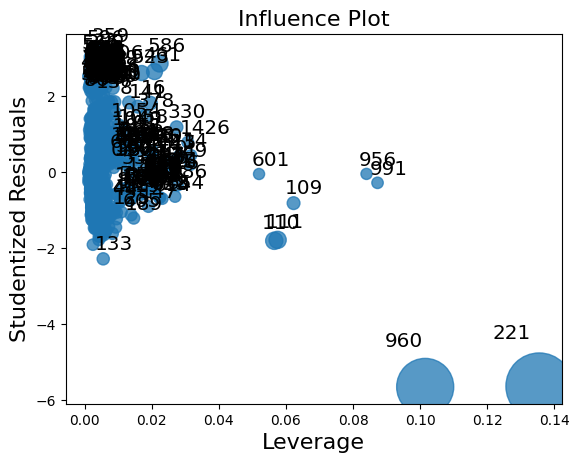

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k=df.shape[1]
n=df.shape[0]
leverage_cutoff=3*((k+1)/n)

In [ ]:
df[df.index.isin([1276,994])]

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
994,999,8,7750,64,43000,86,3,4,5,1015
1276,1283,83,7400,75,74096,110,3,4,5,1050


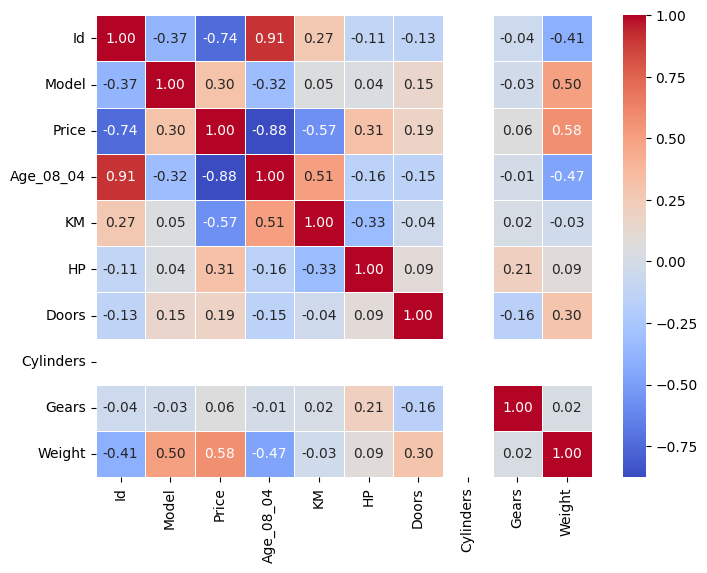

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f",linewidth=0.5)
plt.show()

<ipython-input-31-e6b2d4146b50>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HP'])


<Axes: xlabel='HP', ylabel='Density'>

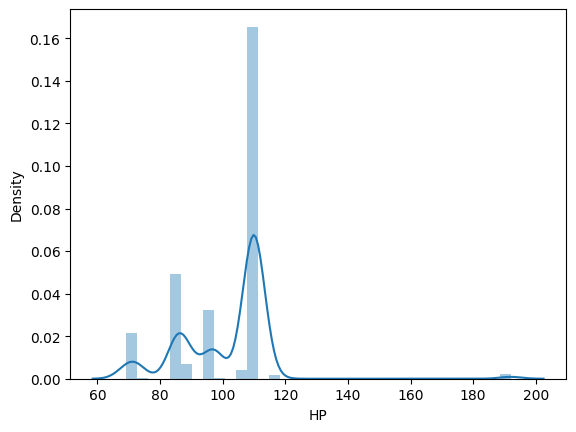

In [ ]:
import seaborn as sns
sns.distplot(df['HP'])

<Figure size 800x600 with 0 Axes>

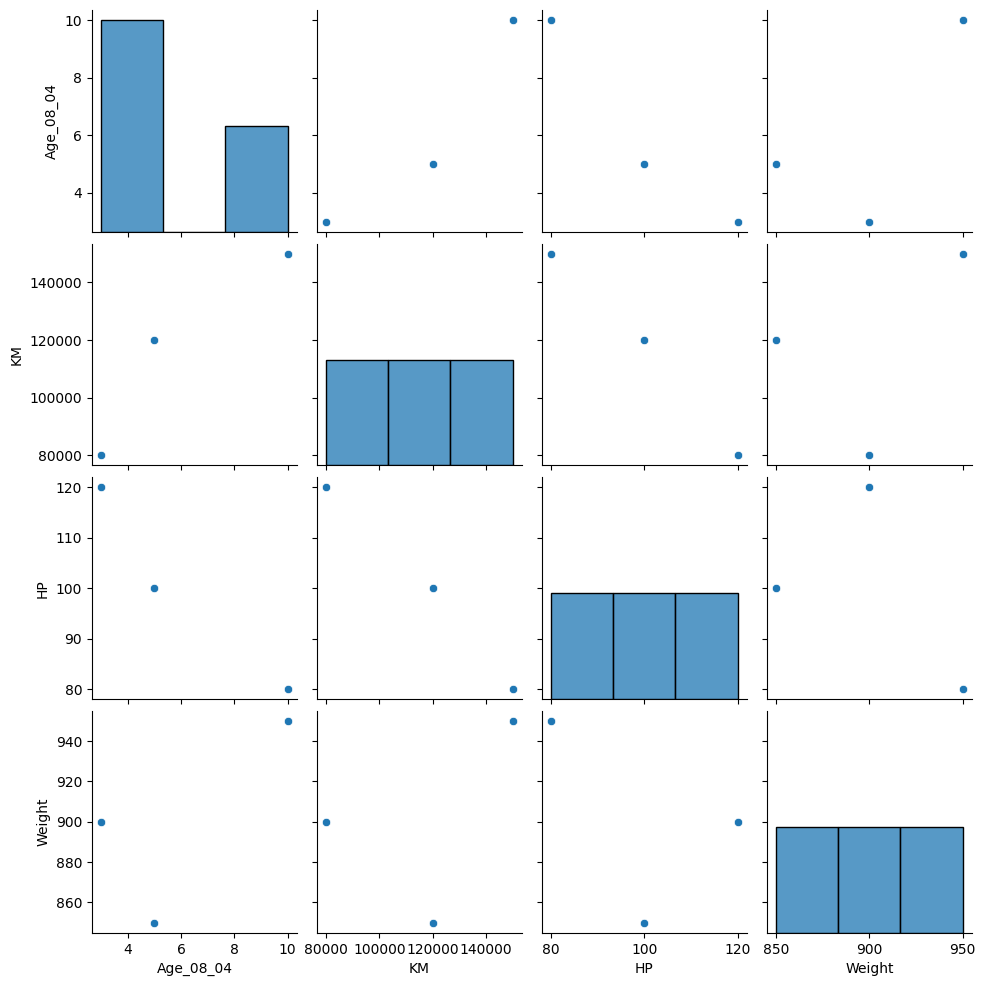

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.DataFrame({
    'Age_08_04': [5, 3, 10],
    'KM': [120000, 80000, 150000],
    'HP': [100, 120, 80],
    'Weight': [850, 900, 950]
})
plt.figure(figsize=(8,6))
sns.pairplot(data)
plt.grid(True)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
X_test = X_test[features]
y_pred = model.predict(X_test)

In [ ]:
X_test = pd.DataFrame(X_test, columns=features)
y_pred = model.predict(X_test)

In [ ]:
new_data = pd.DataFrame({
    'Age_08_04': [5, 3, 10],
    'Doors': [4, 4, 4],
    'HP': [100, 120, 80],
    'Cylinders': [4, 4, 4]
})
price_predictions = model.predict(new_data)
print(price_predictions)

[18985.18630719 20146.88754898 17334.09587151]


In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
file_name=list(uploaded.keys())[0]
cars_new = pd .read_csv(file_name)
cars_new

Saving Toyoto_Corrola.csv to Toyoto_Corrola (1).csv


,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [ ]:
car1 = cars_new.drop(cars_new.index[[956,991,960,221,654]],axis=0).reset_index()

In [ ]:
car1 = car1.drop(['index'],axis=1)
car1

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1426,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1427,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1428,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1429,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [ ]:
final_price1 = smf.ols('Price~KM+Age_08_04+Gears+Weight+Doors',data=car1).fit()

In [ ]:
(final_price1.rsquared,final_price1.aic)

(0.864527675684723, 24671.79291691334)

In [ ]:
final_price2 = smf.ols('Price~KM+Age_08_04',data=car1).fit()

In [ ]:
(final_price2.rsquared,final_price2.aic)

(0.7902642136838732, 25291.256124570147)

In [ ]:
final_price3 = smf.ols('Price~KM+Age_08_04+HP+Weight',data=car1).fit()

In [ ]:
(final_price3.rsquared,final_price3.aic)

(0.8741548209228815, 24564.30681357371)

In [ ]:
final_price4 = smf.ols('Price~KM+Age_08_04+Gears+Weight+HP',data=car1).fit()

In [ ]:
(final_price4.rsquared,final_price4.aic)

(0.8746793357107763, 24560.33003151979)

Universities

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
from google.colab import files
uploaded=files.upload()
file_name=list(uploaded.keys())[0]
df=pd.read_csv(file_name)


df.head()

Saving Universities.csv to Universities.csv


,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [ ]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [ ]:
df.dropna(inplace=True)

In [ ]:
features = ['SAT','Top10','SFRatio','Expenses']

In [ ]:
X = df[features]
y = df['Univ']

['Brown' 'CalTech' 'CMU' 'Columbia' 'Cornell' 'Dartmouth' 'Duke'
 'Georgetown' 'Harvard' 'JohnsHopkins' 'MIT' 'Northwestern' 'NotreDame'
 'PennState' 'Princeton' 'Purdue' 'Stanford' 'TexasA&M' 'UCBerkeley'
 'UChicago']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Univ_Encoded'] = le.fit_transform(df['Univ'])

model = smf.ols

In [ ]:
cfrom sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Univ_Encoded'] = le.fit_transform(df['Univ'])

model = smf.ols

In [ ]:
print(model.tvalues, '\n' ,model.pvalues)

Intercept    0.787747
SAT         -0.787523
Top10        0.707453
SFRatio      0.671976
Expenses     0.448741
dtype: float64 
 Intercept    0.440082
SAT          0.440210
Top10        0.487448
SFRatio      0.509288
Expenses     0.658442
dtype: float64


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.19521858360490119, 0.03426230032588151)

In [ ]:
ml_univ=smf.ols('Univ_Encoded ~ Accept',data=df).fit()
print(ml_univ.tvalues,'\n',ml_univ.pvalues)

Intercept    2.116254
Accept       1.861719
dtype: float64 
 Intercept    0.045358
Accept       0.075470
dtype: float64


In [ ]:
(ml_univ.rsquared,ml_univ.rsquared_adj)

(0.13096038543897204, 0.09317605437110132)

In [ ]:
rsq_univ=smf.ols('Univ_Encoded~SAT+GradRate+SFRatio',data=df).fit().rsquared # Changed 'Univ' to 'Univ_Encoded'
vif_univ=1/(1-rsq_univ)
rsq_sat=smf.ols('SAT~SFRatio+GradRate+Univ_Encoded',data=df).fit().rsquared # Changed 'Univ' to 'Univ_Encoded'
vif_sat=1/(1-rsq_sat)
rsq_sf=smf.ols('GradRate~Univ_Encoded+SFRatio+SAT',data=df).fit().rsquared # Changed 'Univ' to 'Univ_Encoded'
vif_sf=1/(1-rsq_sf)
rsq_top10=smf.ols('Top10~Univ_Encoded+SAT+GradRate',data=df).fit().rsquared # Changed 'Univ' to 'Univ_Encoded'
vif_top10=1/(1-rsq_top10)
d1={'variables':['Univ','SAT','SFRatio','Accept'],'VIF':[vif_univ,vif_sat,vif_sf,vif_top10]}
vif_frame=pd.DataFrame(d1)
vif_frame

,variables,VIF
0,Univ,1.243713
1,SAT,4.748778
2,SFRatio,2.367774
3,Accept,7.285935


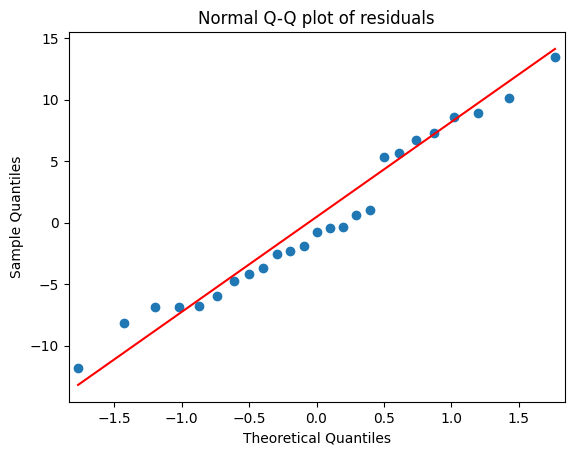

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
def get_standardized_values( vals ):
  return (vals - vals.mean())/vals.std()

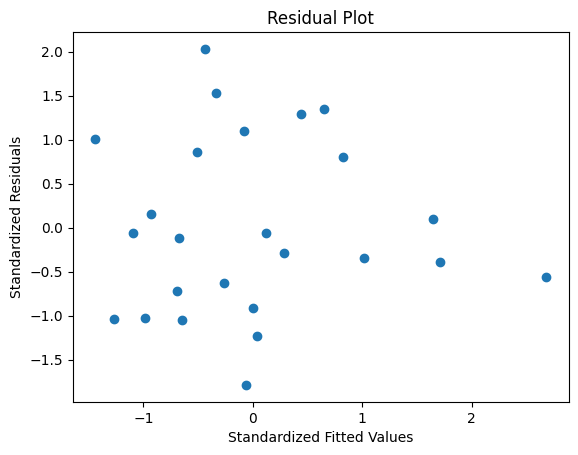

In [ ]:
import matplotlib.pyplot as plt

def get_standardized_values(vals):
    return (vals - vals.mean()) / vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()

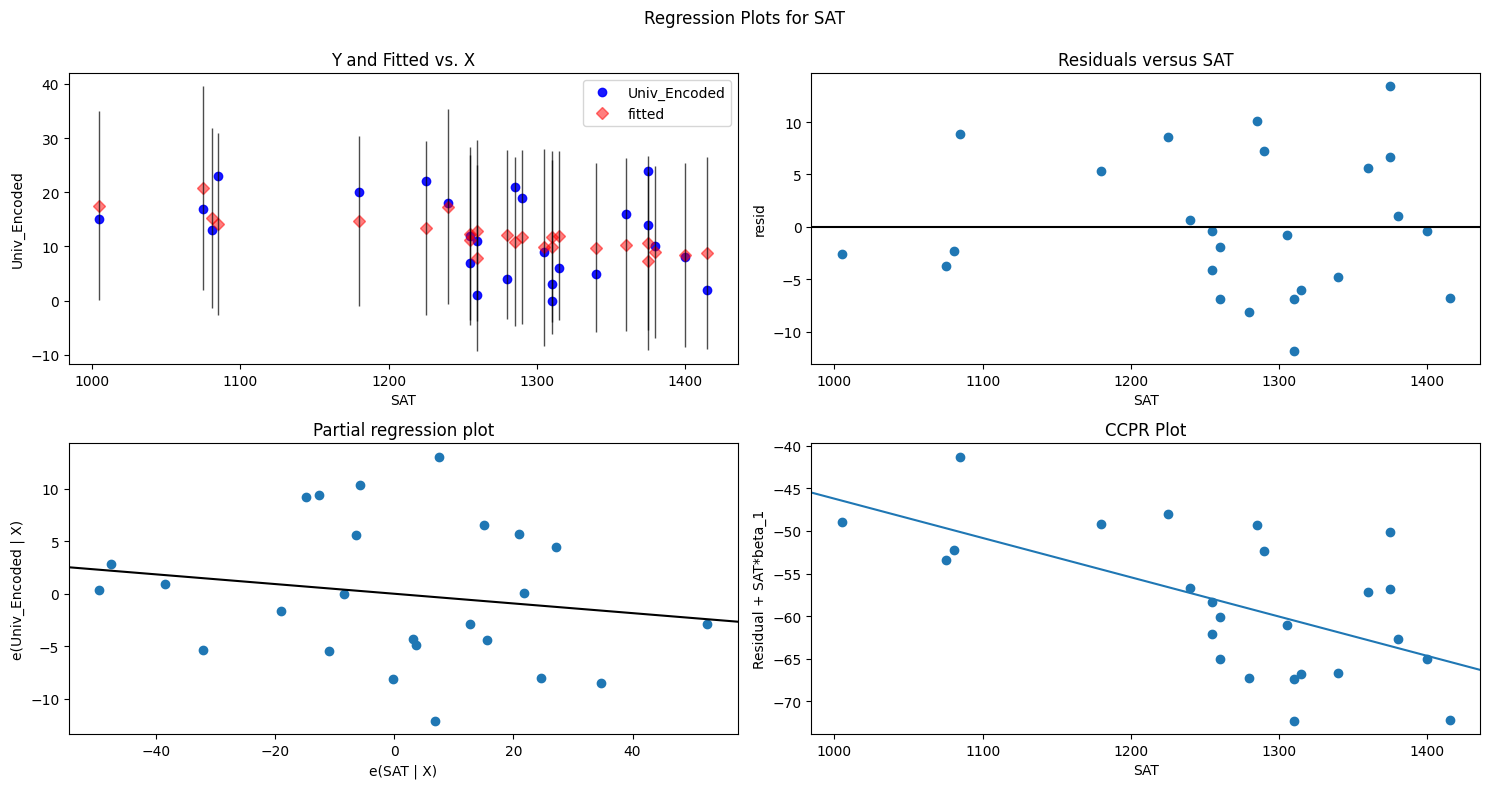

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "SAT", fig=fig)
plt.show()

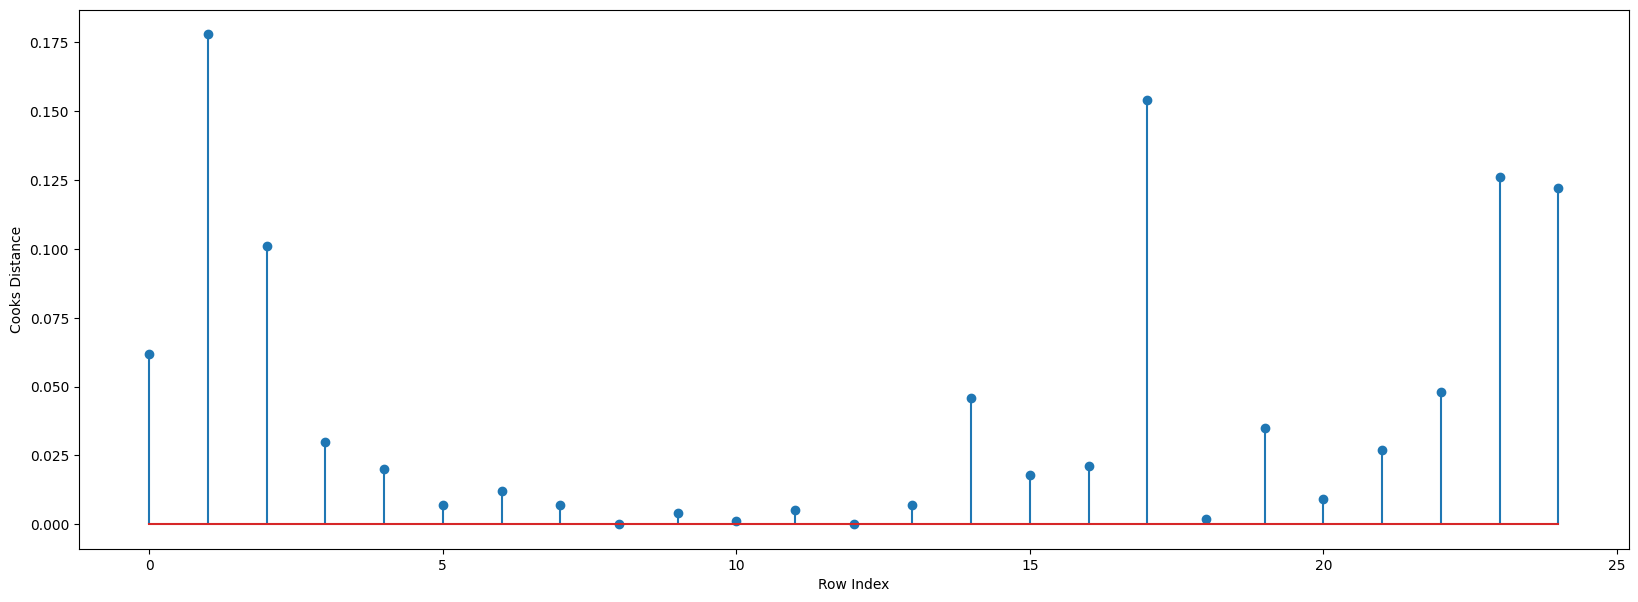

In [ ]:
fig=plt.subplots(figsize=(20,7))
influence = model.get_influence()
c = influence.cooks_distance[0]
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(c),np.max(c))

(1, 0.17846198883984715)

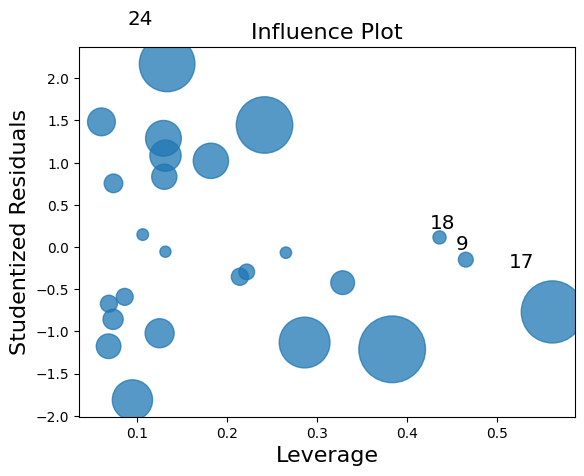

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [ ]:
k=df.shape[1]
n=df.shape[0]
leverage_cutoff=3*((k+1)/n)

In [ ]:
df[df.index.isin([18,50])]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Univ_Encoded
18,UCBerkeley,1240,95,40,17,15140,78,18


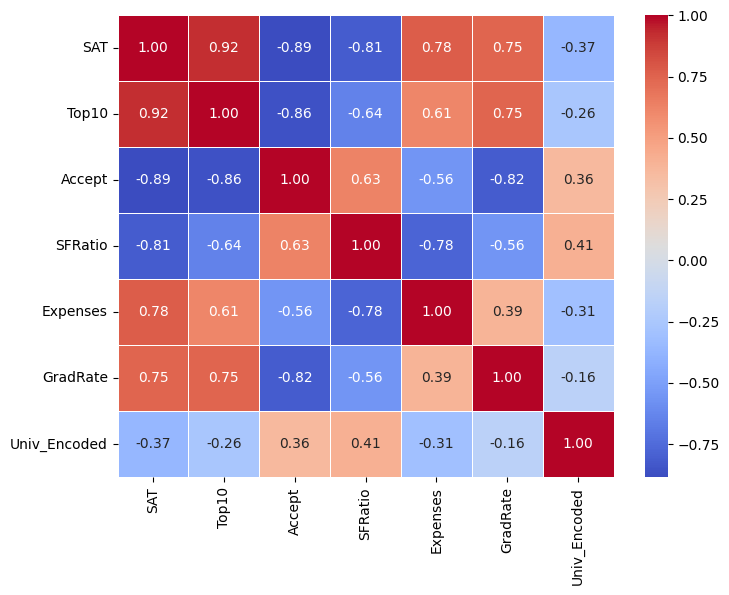

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt=".2f",linewidth=0.5)
plt.show()

<ipython-input-31-23528ca711ed>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SAT'])


<Axes: xlabel='SAT', ylabel='Density'>

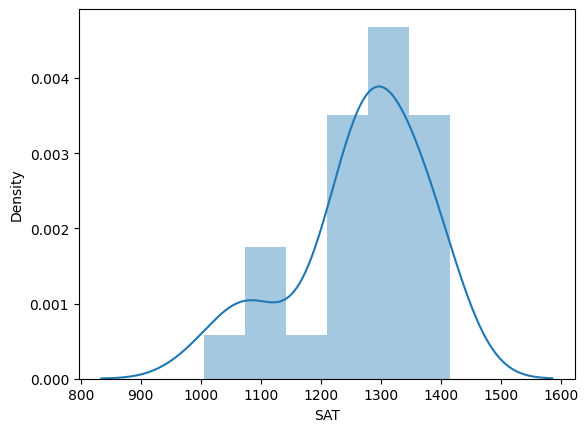

In [ ]:
import seaborn as sns
sns.distplot(df['SAT'])

<Figure size 800x600 with 0 Axes>

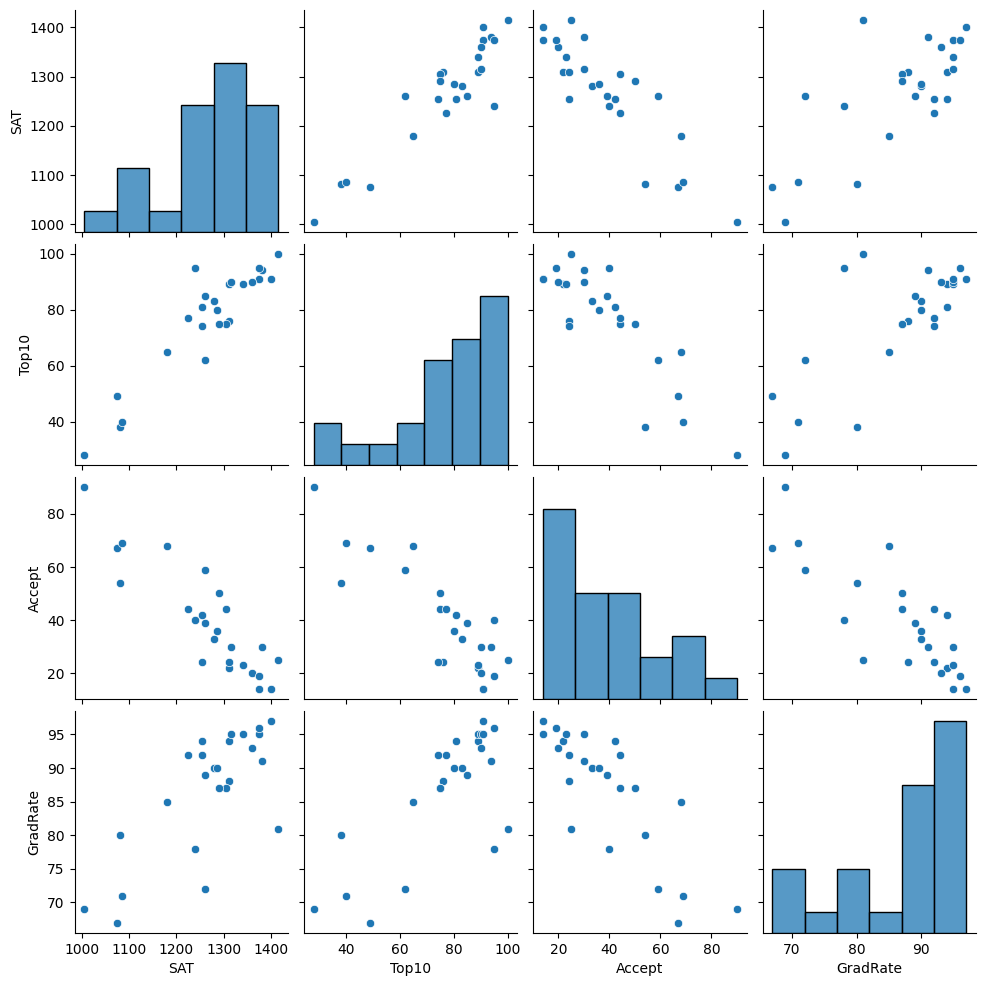

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
features = ['SAT', 'Top10', 'Accept', 'GradRate']
plt.figure(figsize=(8,6))
sns.pairplot(df[features])
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Univ'] = le.fit_transform(df['Univ'])
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Univ_Encoded
0,0,1310,89,22,13,22704,94,0
1,2,1415,100,25,6,63575,81,2
2,1,1260,62,59,9,25026,72,1
3,3,1310,76,24,12,31510,88,3
4,4,1280,83,33,13,21864,90,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Univ'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Univ'], test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test[X_train.columns])

In [ ]:
import pandas as pd

data = pd.DataFrame({
    'SAT': [1200],
    'Top10': [50],
    'SFRatio': [10],
    'Expenses': [30000]
})


univ_predictions = model.predict(data)
print(univ_predictions)

[6.58512044]


improving the model

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
file_name=list(uploaded.keys())[0]
univ = pd .read_csv(file_name)
univ

Saving Universities.csv to Universities (1).csv


,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [ ]:
univ1 = univ.drop(univ.index[[18,13,7,24,22]],axis=0).reset_index()

In [ ]:
univ1 = univ1.drop(['index'],axis=1)
univ1

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Harvard,1400,91,14,11,39525,97
8,JohnsHopkins,1305,75,44,7,58691,87
9,MIT,1380,94,30,10,34870,91


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
univ1['Univ_Encoded'] = le.fit_transform(univ1['Univ'])

In [ ]:
imp1 = smf.ols('Univ_Encoded ~ SAT + Top10 + Accept + SFRatio + Expenses + GradRate', data=univ1).fit()

In [ ]:
(imp1.rsquared,imp1.aic)

(0.3596696951870507, 131.92321398037134)

In [ ]:
imp2= smf.ols('Univ_Encoded ~ Top10  + Expenses + GradRate', data=univ1).fit()

In [ ]:
(imp2.rsquared,imp2.aic)

(0.27378516080490156, 128.44044894667988)